In [1]:
# %run 40_Intro_Expt1.ipynb #uncomment if need to work in this file separately

Choose whether to display code or not.
3.6.8
                  Example
----------------  ----------------------------------------------------------------------------------------------
1. Goal Sentence  Sally wants to buy a bottle of wine for her Friday evening dinner.
2. Goal Step      Sally decides to go to the corner-shop near her house.
3. Condition      The shop is (shut/open) and Sally has (an argument/a good chat) with a neighbour walking home.
The waves are stronger than Rebecca expected, she is not the strongest swimmer, so decides to head back inland. Just as she turns around to do so, she notices the lifeguard shouting at her... SHARK


In [2]:
# set up high-res figure downloads
config = {
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
    'height': None, 'width': None, # download at individually specified sizes
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

## Controllability Rating Split by Valence Rating

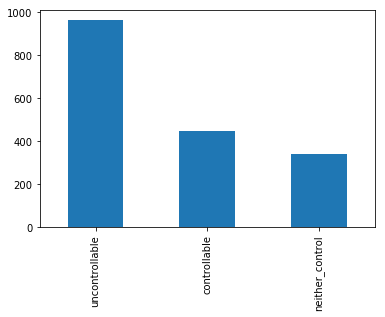

In [3]:
master_data['control_code'].value_counts().plot.bar()

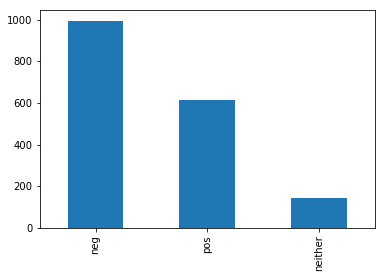

In [4]:
master_data['val_code'].value_counts().plot.bar()

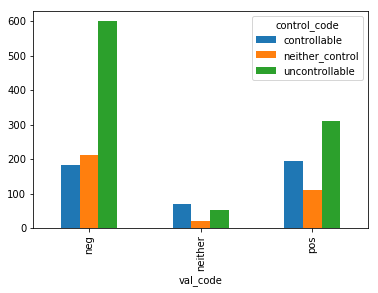

In [5]:
master_data.groupby(['val_code'])['control_code'].value_counts().unstack().plot.bar()

In [6]:
control_by_valence_ratings = master_data.groupby(['val_code'])['control_code'].value_counts().unstack()
control_by_valence_ratings = control_by_valence_ratings/control_by_valence_ratings.sum().sum()
control_by_valence_ratings = control_by_valence_ratings.reindex(["neg", "pos", "neither"])
control_by_valence_ratings

control_code  controllable  neither_control  uncontrollable
val_code                                                   
neg               0.103881         0.120434        0.343037
pos               0.111301         0.062785        0.176941
neither           0.039384         0.011986        0.030251

In [15]:
fig = go.Figure()

fig.add_trace(go.Bar(name="Uncontrollable Outcome",
                     x=['Negative', 'Positive','Neither'],
                     y=control_by_valence_ratings['uncontrollable'], 
                     text=control_by_valence_ratings['uncontrollable'],
                     marker_color='#FFA15A',
                    )
             )

fig.add_trace(go.Bar(name="Controllable Outcome",
                     x=['Negative','Positive','Neither'],
                     y=control_by_valence_ratings['controllable'], 
                     text=control_by_valence_ratings['controllable'], 
                     marker_color='#636EFA',
                    )
             )

fig.add_trace(go.Bar(name="Neither",
                     x=['Negative','Positive','Neither'],
                     y=control_by_valence_ratings['neither_control'], 
                     text=control_by_valence_ratings['neither_control'], 
                     marker_color='grey',
                    ),
             )

fig.update_traces(texttemplate='%{text:.2%}',
                          textposition='outside')

fig.update_xaxes(title="Outcome Valence",)
fig.update_yaxes(title="Percent of Outcomes",
                 tickformat= ',.0%',
                 range=(0,.4)
                )

fig.update_layout(template=None,
                 font_family='Times New Roman',
                 font_size=12,
                 width=500, height=350,
                 margin_l=50,
                 margin_r=0,
                 margin_t=15,
                 margin_b=40,
                 legend=dict(
                     yanchor="top",
                     y=1,
                     xanchor="right",
                     x=0.99,
                     bordercolor="grey",
                     borderwidth=1
                             ),
                 )
fig.show(config=config)

In [8]:
#save the figure
another_interx_fig = Export.figure(
    'interxoverallbar',  # Export name
    image=fig,             # The plot to be exported
    data=pd.crosstab(master_data['control_code'],
                    master_data['val_code'],),     # The data used to produce the plot.
    text_width=1, #fig width relative to textwidth=1
    caption='Percent of each outcome controllability by outcome valence.'
) 

another_interx_fig > latex_report;

Could not generate 3_output//control_report/_kallysto/figs/4_Experiment1_Analysis.ipynb//interxoverallbar.pdf. Missing savefig.


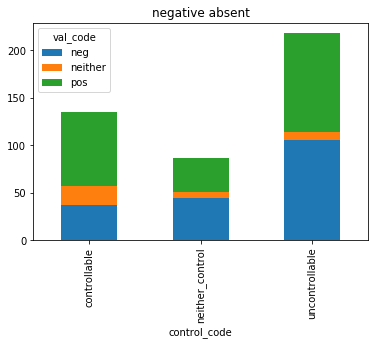

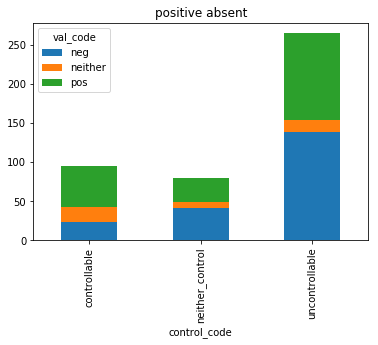

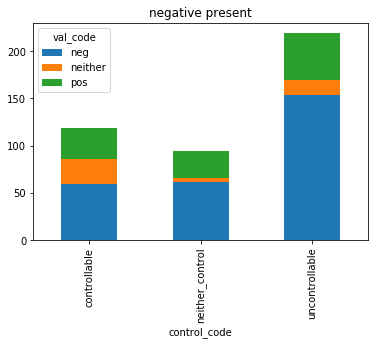

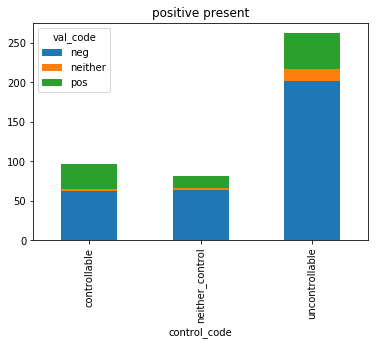

In [9]:
for val, means in zipped_cond_pairs:
    plot = master_data[
        (master_data['valence_condition']==val) & (master_data['means_condition']==means)
    ].groupby(
        ['control_code']
    )['val_code'].value_counts(
        normalize=False
                              ).unstack(
    ).plot.bar(
        stacked=True, title=str(val + " " + means))

In [10]:
prop_outcome_control_valence= master_data.groupby(['control_code'])['val_code'].value_counts(normalize=False)/len(master_data)*100
prop_outcome_control_valence

control_code     val_code
controllable     pos         11.130137
                 neg         10.388128
                 neither      3.938356
neither_control  neg         12.043379
                 pos          6.278539
                 neither      1.198630
uncontrollable   neg         34.303653
                 pos         17.694064
                 neither      3.025114
Name: val_code, dtype: float64

In [11]:
fig = make_subplots(rows=2, cols=2, 
#                     shared_xaxes=True, 
                    shared_yaxes=True,
                    horizontal_spacing=0.1,
                    vertical_spacing=0.15,
                    subplot_titles=[str(' '.join(i)).title() for i in zipped_cond_pairs]
                   )

idx = 0
n_cols = 2
togglelegend=True

    


for val, means in zipped_cond_pairs:
    fig_data = master_data[
        (master_data['valence_condition']==val) & (master_data['means_condition']==means)
    ].groupby(['control_code'])['val_code'].value_counts(normalize=False).unstack()
    

    data=[
            go.Bar(name="Negative",
                   y=['Controllable','Neither','Uncontrollable'], 
                   x=fig_data['neg'], 
                   marker_color='#EF553B',
                   orientation='h',
                   showlegend=togglelegend),
            go.Bar(name="Neither",
                   y=['Controllable','Neither','Uncontrollable'], 
                   x=fig_data['pos'], 
                   marker_color='grey',
                   orientation='h',
                   showlegend=togglelegend),
            go.Bar(name="Positive",
                   y=['Controllable','Neither','Uncontrollable'], 
                   x=fig_data['pos'], 
                   marker_color='#00CC96',
                   orientation='h',
                   showlegend=togglelegend),
        ]
    
    
    
#     print(ratings_by_condition_pair_fig.layout)
## MAKE THE MAIN PLOT ##    
    fig.add_trace(data[0], row=idx//n_cols+1, col=idx%n_cols+1,
                 )
    fig.add_trace(data[1], row=idx//n_cols+1, col=idx%n_cols+1,
                 )
    fig.add_trace(data[2], row=idx//n_cols+1, col=idx%n_cols+1,
                 )
    idx += 1
    togglelegend=False

fig.update_xaxes(title_text="Frequency of Outcomes", row=2)
# fig.update_xaxes(title_text="Uncontrollable", row=2, col=1)
# fig.update_xaxes(title_text="Controllable", row=2, col=2)
# fig.update_yaxes(title_text="Negative", row=1, col=1)
# fig.update_yaxes(title_text="Positive", row=2, col=1)

fig.update_xaxes(range=[0,200])
fig.update_layout(#barmode='stack', 
                              template = 'none', 
                              font_family="Times New Roman", font_size=12,
                              legend_title="Outcome Valence",
                                    legend=dict(
                                        orientation='h',
                                    yanchor="bottom",
                                    y=1.07,
                                    xanchor="left",
                                    x=0.01
                                ),
                              width = 500, height = 350,
#                               showlegend=False,
                              #remove some margin so the graph fits nicer in latex
                              margin_l=90, #left margin
                              margin_r=10, #right margin
                              margin_b=40, #bottom margin
                              margin_t=20, #top margin
                             )
    
    
    
fig.show(config=config)

In [12]:
#save the figure
another_interx_fig = Export.figure(
    'interxHbar',  # Export name
    image=fig,             # The plot to be exported
    data=pd.crosstab(master_data['control_code'],
                    master_data['val_code'],),     # The data used to produce the plot.
    text_width=1, #fig width relative to textwidth=1
    caption='Categories of unexpected events, reported by outcome-valence (positive, negative, neither) and outcome-controllability (uncontrollable, controllable, neither), collapsing across the four conditions in the study.'
) 

another_interx_fig > latex_report;

Could not generate 3_output//control_report/_kallysto/figs/4_Experiment1_Analysis.ipynb//interxHbar.pdf. Missing savefig.


In [13]:
chi_dvs = master_data.groupby(['control_code'])['val_code'].value_counts().unstack()

print("Chi square of all dvs:")
print(tabulate(chi_dvs, headers="keys", tablefmt='fancy_grid'))
obs = np.array([chi_dvs.loc[('controllable')], chi_dvs.loc[('neither_control')], chi_dvs.loc[('uncontrollable')]])
pvalue, williams_chi, williams_pvalue, williams_deffre, effect_size = print_chi(obs)
       
#save the william's chi info
if williams_pvalue < 0.001:
    p = "p < .001"
else:
    p = f"p = {williams_pvalue:.3f}"

    export_value_chi_apa(str(val.title() + means.title() + "ValenceOutcomeByControlOutcomeChi"), 
                     williams_chi, 
                     williams_deffre, 
                     N = sum(sum(obs)), 
                     p = p, 
                     v = "{:.3f}".format(effect_size))

Chi square of all dvs:
╒═════════════════╤═══════╤═══════════╤═══════╕
│ control_code    │   neg │   neither │   pos │
╞═════════════════╪═══════╪═══════════╪═══════╡
│ controllable    │   182 │        69 │   195 │
├─────────────────┼───────┼───────────┼───────┤
│ neither_control │   211 │        21 │   110 │
├─────────────────┼───────┼───────────┼───────┤
│ uncontrollable  │   601 │        53 │   310 │
╘═════════════════╧═══════╧═══════════╧═══════╛
Unadjusted Chi-Square
X^2 =  78.72040774475563
degrees of freedom:  4
p =  0.0000000000000003 

William's Corrected Chi-Square
X^2 =  78.42841853719075
degrees of freedom:  4
p =  0.0000000000000004 

Cramer's v effect size =  0.150 



# The following Chi-Squares are presented in the "Frequency of Unexpected Outcomes: A Negative-Uncontrollability Bias" Section of the paper.

In [14]:
## MAKE THE SUBPLOTS ##
import plotly.figure_factory as ff

x = ['Negative', 'Neither', 'Positive']
y = ['Controllable', 'Neither', 'Uncontrollable']

annot_list = []
zipped_cond_pairs = list(zip(
    ['negative','negative','positive','positive'],
    ['absent','present','absent','present']
))

subplot_titles_list =[str(' '.join(i)).title() for i in zipped_cond_pairs]

fig = make_subplots(rows=2, cols=2, 
                    shared_xaxes=True, shared_yaxes=True,
                    x_title='Outcome Valence',
                    y_title='Outcome Controllability',
                    subplot_titles=[str(' '.join(i)).title() for i in zipped_cond_pairs]
                   )

idx = 0
n_cols = 2

for val, means in zipped_cond_pairs:
    z = np.round(pd.crosstab(master_data[(master_data['valence_condition']==val) & 
                    (master_data['means_condition']==means)
                   ]['control_code'],
                    master_data[(master_data['valence_condition']==val) & 
                    (master_data['means_condition']==means)
                   ]['val_code'], 
                    normalize='all').values, 2)
    
    ratings_by_condition_pair_fig = ff.create_annotated_heatmap(
        z, x=x, y=y, 
        colorscale='Greys', 
        xaxis=f'x{idx+1}', yaxis=f'y{idx+1}',
        
    )
    
    for annot in list(ratings_by_condition_pair_fig.layout.annotations):
        annot.update({'xref': f'x{idx+1}', 'yref': f'y{idx+1}'})
    annot_list.extend(list(ratings_by_condition_pair_fig.layout.annotations))
    
    
    
    ratings_by_condition_pair_fig.layout.update(
        {
         f'xaxis{idx+1}':{'anchor':f'x{idx+1}'},
         f'yaxis{idx+1}':{'anchor':f'y{idx+1}'},
        
        }
    )
    
#     print(ratings_by_condition_pair_fig.layout)
## MAKE THE MAIN PLOT ##    
    fig.add_trace(ratings_by_condition_pair_fig.data[0], row=idx//n_cols+1, col=idx%n_cols+1,
                 )
    
    idx += 1
    

    
## GET the CHI-SQUARE STATS ##
    print(val, means)
    chi_dvs = pd.crosstab(master_data[(master_data['valence_condition']==val) & 
                    (master_data['means_condition']==means)
                   ]['control_code'],
                    master_data[(master_data['valence_condition']==val) & 
                    (master_data['means_condition']==means)
                   ]['val_code'])
    
    print(tabulate(chi_dvs, headers="keys", tablefmt='fancy_grid'))
    obs = np.array([chi_dvs.loc[('controllable')], chi_dvs.loc[('neither_control')], chi_dvs.loc[('uncontrollable')]])
    pvalue, williams_chi, williams_pvalue, williams_deffre, effect_size = print_chi(obs)
       

## SAVE THE STATS TO KALLYSTO ##    
#save the william's chi info
    if williams_pvalue < 0.001:
        p = "p < .001"
    else:
        p = f"p = {williams_pvalue:.3f}"

    export_value_chi_apa(str(val.title() + means.title() + "ValenceOutcomeByControlOutcomeChi"), 
                         williams_chi, 
                         williams_deffre, 
                         N = sum(sum(obs)), 
                         p = p, 
                         v = "{:.3f}".format(effect_size))


## ADD THE CORRECT ANNOTATIONS AND SHOW THE MAIN PLOT ##    
for anno in annot_list:
    fig.add_annotation(anno)

fig.show()

## SAVE THE FIGURE TO KALLYSTO ##    
savefig = Export.figure('RatingsByConditionHeatmap',  # Export name
    image=fig,             # The plot to be exported
    data=pd.crosstab(master_data['control_code'],
                    master_data['val_code'], 
                    normalize='all'),     # The data used to produce the plot.
    text_width=1, #fig width relative to textwidth=1
    caption='Crosstabs of outcome controllability and valence ratings by condition.'
) 

savefig > latex_report;

negative absent
╒═════════════════╤═══════╤═══════════╤═══════╕
│ control_code    │   neg │   neither │   pos │
╞═════════════════╪═══════╪═══════════╪═══════╡
│ controllable    │    37 │        20 │    78 │
├─────────────────┼───────┼───────────┼───────┤
│ neither_control │    45 │         6 │    36 │
├─────────────────┼───────┼───────────┼───────┤
│ uncontrollable  │   106 │         8 │   104 │
╘═════════════════╧═══════╧═══════════╧═══════╛
Unadjusted Chi-Square
X^2 =  27.502447193490067
degrees of freedom:  4
p =  0.0000157306807966 

William's Corrected Chi-Square
X^2 =  27.111787569112753
degrees of freedom:  4
p =  0.0000188707434309 

Cramer's v effect size =  0.176 

negative present
╒═════════════════╤═══════╤═══════════╤═══════╕
│ control_code    │   neg │   neither │   pos │
╞═════════════════╪═══════╪═══════════╪═══════╡
│ controllable    │    59 │        27 │    33 │
├─────────────────┼───────┼───────────┼───────┤
│ neither_control │    62 │         4 │    28 │
├─────────

Could not generate 3_output//control_report/_kallysto/figs/4_Experiment1_Analysis.ipynb//RatingsByConditionHeatmap.pdf. Missing savefig.
